In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [29]:
egitimVeri=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta13/yaprakveriseti/train.csv")
testVeri=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta13/yaprakveriseti/test.csv")
print(egitimVeri.shape)

(990, 194)


In [3]:
l
2929

In [4]:
#Eğitim ve test verileri gereksiz bilgilerden arındırılır 
egitimVeri = egitimVeri.drop(["id","species"],axis=1) 
testveri = testVeri.drop(["id"],axis=1) 
nb_features = 192 
nb_classes = len(classes)

In [8]:
 #Verilerin standartlaştırılması 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(egitimVeri.values)
eğitimVeri = scaler.transform(egitimVeri.values) 
#Eğitim ve doğrulama verilerinin belirlenmesi 
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(eğitimVeri, labels, test_size = 0.2) 

In [10]:
#Çıktı değerlerinin kategorileştirilmesi 
from tensorflow.keras.utils import to_categorical 
y_train=to_categorical(y_train) 
y_valid = to_categorical(y_valid)
#Girdi verilerinin yeniden boyutlandırılması 
X_train = np.array(X_train).reshape(792,192,1) 
X_valid = np.array(X_valid).reshape(198,192,1)

In [11]:
 #Modelin oluşturulması 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.layers import Flatten, LSTM, BatchNormalization 
model = Sequential() 
model.add(LSTM(512, input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(BatchNormalization()) 
model.add((Flatten()))
model.add(Dropout (0.15)) 
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense (nb_classes, activation="softmax")) 
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                        

In [14]:
#Modelin kesinlik, fl-skor gibi değerlerin oluşturulması 
from keras import backend as K 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall
def precision_m(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) 
    precision = true_positives / (predicted_positives + K.epsilon()) 
    return precision
def f1_m(y_true, y_pred): 
    precision = precision_m(y_true, y_pred) 
    recall =recall_m(y_true, y_pred) 
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [16]:
#Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy",f1_m,precision_m,recall_m]) 
 #Modelin eğitilmesi 
score = model.fit(X_train, y_train, epochs = 100, validation_data=(X_valid,y_valid))


Epoch 1/100
25/25 [==============================] - 36s 1s/step - loss: 4.3140 - accuracy: 0.0391 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 4.5501 - val_accuracy: 0.0455 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 32s 1s/step - loss: 3.4863 - accuracy: 0.1212 - f1_m: 0.0323 - precision_m: 0.1967 - recall_m: 0.0179 - val_loss: 4.4990 - val_accuracy: 0.0657 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 31s 1s/step - loss: 3.1535 - accuracy: 0.1515 - f1_m: 0.0339 - precision_m: 0.2647 - recall_m: 0.0183 - val_loss: 4.4380 - val_accuracy: 0.0960 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 32s 1s/step - loss: 2.8126 - accuracy: 0.2071 - f1_m: 0.0836 - precision_m: 0.4410 - recall_m: 0.0475 - 

25/25 [==============================] - 45s 2s/step - loss: 0.2980 - accuracy: 0.8952 - f1_m: 0.8937 - precision_m: 0.9028 - recall_m: 0.8850 - val_loss: 2.6556 - val_accuracy: 0.5101 - val_f1_m: 0.5014 - val_precision_m: 0.5845 - val_recall_m: 0.4449
Epoch 32/100
25/25 [==============================] - 33s 1s/step - loss: 0.3883 - accuracy: 0.8838 - f1_m: 0.8822 - precision_m: 0.8947 - recall_m: 0.8704 - val_loss: 2.6884 - val_accuracy: 0.5758 - val_f1_m: 0.5749 - val_precision_m: 0.6272 - val_recall_m: 0.5312
Epoch 33/100
25/25 [==============================] - 32s 1s/step - loss: 0.3393 - accuracy: 0.8851 - f1_m: 0.8848 - precision_m: 0.9007 - recall_m: 0.8700 - val_loss: 2.8927 - val_accuracy: 0.4192 - val_f1_m: 0.4426 - val_precision_m: 0.4907 - val_recall_m: 0.4048
Epoch 34/100
25/25 [==============================] - 50s 2s/step - loss: 0.4770 - accuracy: 0.8598 - f1_m: 0.8575 - precision_m: 0.8803 - recall_m: 0.8367 - val_loss: 2.7863 - val_accuracy: 0.4596 - val_f1_m: 0.474

Epoch 62/100
25/25 [==============================] - 44s 2s/step - loss: 0.1591 - accuracy: 0.9419 - f1_m: 0.9401 - precision_m: 0.9468 - recall_m: 0.9337 - val_loss: 3.0407 - val_accuracy: 0.5556 - val_f1_m: 0.5905 - val_precision_m: 0.6260 - val_recall_m: 0.5595
Epoch 63/100
25/25 [==============================] - 44s 2s/step - loss: 0.1615 - accuracy: 0.9369 - f1_m: 0.9397 - precision_m: 0.9432 - recall_m: 0.9362 - val_loss: 2.8741 - val_accuracy: 0.5354 - val_f1_m: 0.5619 - val_precision_m: 0.5898 - val_recall_m: 0.5372
Epoch 64/100
25/25 [==============================] - 43s 2s/step - loss: 0.2404 - accuracy: 0.9167 - f1_m: 0.9174 - precision_m: 0.9227 - recall_m: 0.9125 - val_loss: 3.5365 - val_accuracy: 0.5253 - val_f1_m: 0.5163 - val_precision_m: 0.5522 - val_recall_m: 0.4851
Epoch 65/100
25/25 [==============================] - 44s 2s/step - loss: 0.2331 - accuracy: 0.9230 - f1_m: 0.9216 - precision_m: 0.9282 - recall_m: 0.9154 - val_loss: 3.1472 - val_accuracy: 0.5455 - va

Epoch 93/100
25/25 [==============================] - 31s 1s/step - loss: 0.0952 - accuracy: 0.9672 - f1_m: 0.9672 - precision_m: 0.9691 - recall_m: 0.9654 - val_loss: 3.4356 - val_accuracy: 0.5808 - val_f1_m: 0.5795 - val_precision_m: 0.6091 - val_recall_m: 0.5536
Epoch 94/100
25/25 [==============================] - 31s 1s/step - loss: 0.1382 - accuracy: 0.9571 - f1_m: 0.9558 - precision_m: 0.9601 - recall_m: 0.9517 - val_loss: 3.2451 - val_accuracy: 0.5000 - val_f1_m: 0.5146 - val_precision_m: 0.5522 - val_recall_m: 0.4821
Epoch 95/100
25/25 [==============================] - 31s 1s/step - loss: 0.1253 - accuracy: 0.9583 - f1_m: 0.9568 - precision_m: 0.9604 - recall_m: 0.9533 - val_loss: 3.7140 - val_accuracy: 0.4949 - val_f1_m: 0.4573 - val_precision_m: 0.4779 - val_recall_m: 0.4390
Epoch 96/100
25/25 [==============================] - 31s 1s/step - loss: 0.0925 - accuracy: 0.9672 - f1_m: 0.9656 - precision_m: 0.9706 - recall_m: 0.9608 - val_loss: 3.6687 - val_accuracy: 0.5556 - va

In [19]:
#Ortalama değerlendirme kriterleri 
print(("Ortalama Eğitim Kaybı: ", np.mean (model.history.history["loss"]))) 
print(("Ortalama Eğitim Başarımı:", np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı:", np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı:", np.mean (model.history.history["val_accuracy"]))) 
print(("Ortalama F1-Skor Değeri: ", np.mean(model.history.history["val_f1_m"])))
print(("Ortalama Kesinlik Değeri: ",np.mean(model.history.history["val_precision_m"]))) 
print(("Ortalama Duyarlılık Değeri:",   np.mean(model.history.history["val_recall_m"]))) 

('Ortalama Eğitim Kaybı: ', 0.5468855606019497)
('Ortalama Eğitim Başarımı:', 0.8343939426168799)
('Ortalama Doğrulama Kaybı:', 3.232283124923706)
('Ortalama Doğrulama Başarımı:', 0.47540403783321383)
('Ortalama F1-Skor Değeri: ', 0.41730301739647985)
('Ortalama Kesinlik Değeri: ', 0.48249051839113233)
('Ortalama Duyarlılık Değeri:', 0.3893154767807573)


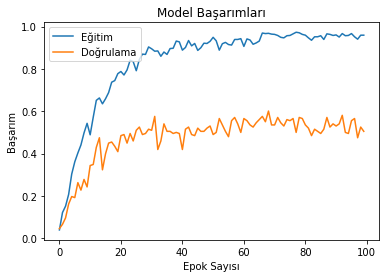

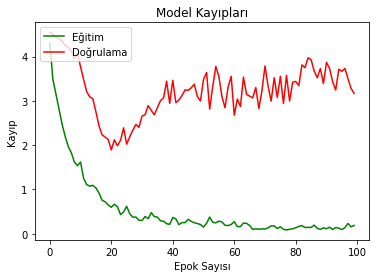

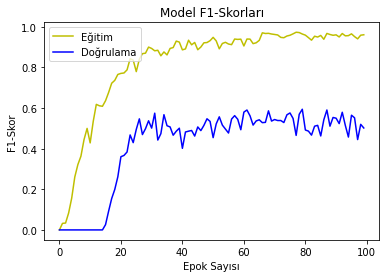

In [28]:
#Eğitim ve doğrulama değerlerinin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt 
plt.plot(model.history.history["accuracy"]) 
plt.plot(model.history.history["val_accuracy"]) 
plt.title("Model Başarımları") 
plt.ylabel("Başarım") 
plt.xlabel("Epok Sayısı") 
plt.legend(["Eğitim","Doğrulama"],loc="upper left") 
plt.show() 

plt.plot(model.history.history["loss"],color="g")
plt.plot(model.history.history["val_loss"],color="r") 
plt.title("Model Kayıpları") 
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı") 
plt.legend (["Eğitim","Doğrulama"],loc="upper left")
plt.show() 

plt.plot(model.history.history["f1_m"],color="y") 
plt.plot(model.history.history["val_f1_m"],color="b") 
plt.title("Model F1-Skorları") 
plt.ylabel("F1-Skor") 
plt.xlabel("Epok Sayısı") 
plt.legend (["Eğitim","Doğrulama"],loc="upper left")
plt.show()